# PREDICTING PAY WITH OTHER INDICATORS


### FACTORS CONTRIBUTING TO GENDER PAY GAP IN 2022

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder

In [2]:
df=pd.read_csv('WBL 2022.csv')

In [3]:
df.head()

,Economy,Economy Code,ISO Code,Region,Income Group,Report Year,WBL INDEX,MOBILITY,WORKPLACE,PAY,MARRIAGE,PARENTHOOD,Days for the mother,Days for the father,ENTREPRENEURSHIP,ASSETS,PENSION
0,Afghanistan,AFG,AFG,South Asia,Low income,2022,38.1,50,75,0,20,20,0,0,75,40,25
1,Albania,ALB,ALB,Europe & Central Asia,Upper middle income,2022,91.3,100,100,100,100,80,0,0,100,100,50
2,Algeria,DZA,DZA,Middle East & North Africa,Lower middle income,2022,57.5,75,75,50,60,60,0,0,75,40,25
3,Angola,AGO,AGO,Sub-Saharan Africa,Lower middle income,2022,79.4,100,100,50,100,60,0,0,100,100,25
4,Antigua and Barbuda,ATG,ATG,Latin America & Caribbean,High income,2022,66.3,75,50,75,100,0,0,0,75,80,75


In [4]:
df.shape

(190, 17)

In [5]:
# Dropping some irrelivant columns
df.drop(columns=['Economy Code','Report Year','Days for the mother','Days for the father'],inplace=True)


In [6]:
df.head()

,Economy,ISO Code,Region,Income Group,WBL INDEX,MOBILITY,WORKPLACE,PAY,MARRIAGE,PARENTHOOD,ENTREPRENEURSHIP,ASSETS,PENSION
0,Afghanistan,AFG,South Asia,Low income,38.1,50,75,0,20,20,75,40,25
1,Albania,ALB,Europe & Central Asia,Upper middle income,91.3,100,100,100,100,80,100,100,50
2,Algeria,DZA,Middle East & North Africa,Lower middle income,57.5,75,75,50,60,60,75,40,25
3,Angola,AGO,Sub-Saharan Africa,Lower middle income,79.4,100,100,50,100,60,100,100,25
4,Antigua and Barbuda,ATG,Latin America & Caribbean,High income,66.3,75,50,75,100,0,75,80,75


In [7]:
df.describe()

,WBL INDEX,MOBILITY,WORKPLACE,PAY,MARRIAGE,PARENTHOOD,ENTREPRENEURSHIP,ASSETS,PENSION
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,76.560526,88.552632,80.526316,68.684211,80.105263,55.578947,84.342105,81.157895,73.421053
std,17.015600,20.984622,29.022648,29.873725,27.487168,31.629997,17.104219,26.760278,25.924832
min,26.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.050000,75.000000,50.000000,50.000000,60.000000,40.000000,75.000000,60.000000,50.000000
50%,80.000000,100.000000,100.000000,75.000000,100.000000,60.000000,75.000000,100.000000,75.000000
75%,88.100000,100.000000,100.000000,100.000000,100.000000,80.000000,100.000000,100.000000,100.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [8]:
df.shape

(190, 13)

In [9]:
mean_indicator = df[['MOBILITY', 'WORKPLACE', 'PAY', 'MARRIAGE', 'PARENTHOOD', 'ENTREPRENEURSHIP',
                     'ASSETS', 'PENSION']].mean().sort_values(ascending=False)
mean_WBL_index = df["WBL INDEX"].mean()

In [10]:
mean_WBL_index

76.56052631578939

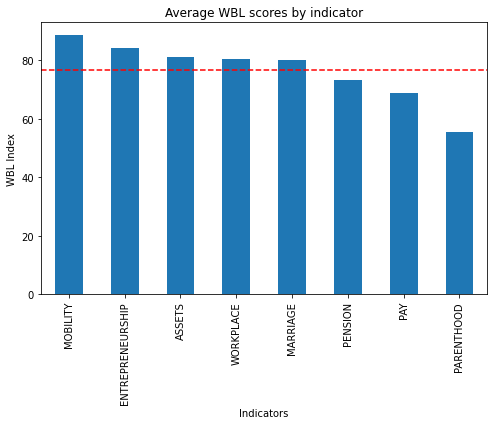

In [11]:
plt.figure(figsize=(8,5))
mean_indicator.plot(kind='bar')
plt.axhline(mean_WBL_index, linestyle='--', color='r', label='Global average 76.5')
plt.xlabel('Indicators')
plt.ylabel('WBL Index')
plt.title('Average WBL scores by indicator');

Income Group
High income            86.364912
Upper middle income    77.896154
Lower middle income    70.354545
Low income             65.523077
Name: WBL INDEX, dtype: float64


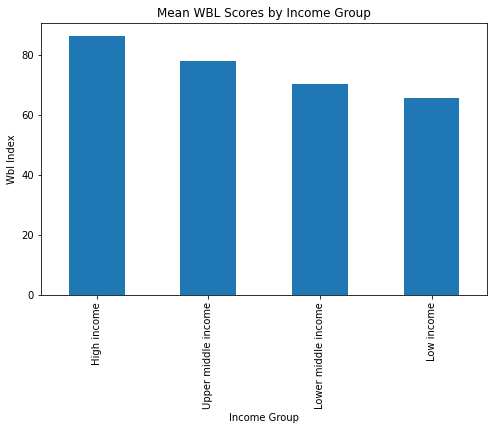

In [12]:
plt.figure(figsize=(8,5))
mean_pay_by_income_group = df.groupby('Income Group')['WBL INDEX'].mean().sort_values(ascending=False)
print(mean_pay_by_income_group)
mean_pay_by_income_group.plot(kind='bar')
plt.xlabel('Income Group')
plt.ylabel('Wbl Index')
plt.title('Mean WBL Scores by Income Group')
plt.show()

### EXPLORE

In [13]:
# Drop leaky columns
df.drop(columns='WBL INDEX', inplace=True)

In [14]:
# Drop low- and high cardinality categorical features
df.drop(columns=['Economy','ISO Code','Region','Income Group'])

,MOBILITY,WORKPLACE,PAY,MARRIAGE,PARENTHOOD,ENTREPRENEURSHIP,ASSETS,PENSION
0,50,75,0,20,20,75,40,25
1,100,100,100,100,80,100,100,50
2,75,75,50,60,60,75,40,25
3,100,100,50,100,60,100,100,25
4,75,50,75,100,0,75,80,75
...,...,...,...,...,...,...,...,...
185,100,100,100,100,80,100,100,0
186,25,25,0,20,0,75,40,25
187,25,25,25,0,0,75,40,25
188,75,100,100,80,40,100,80,75


<AxesSubplot:>

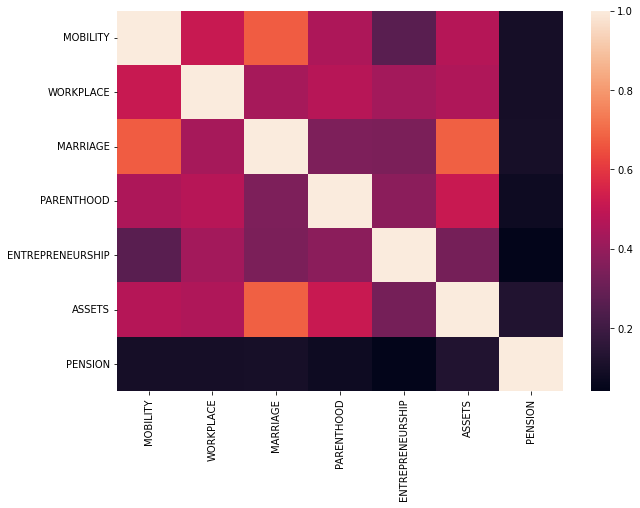

In [15]:
plt.figure(figsize=(10,7))
corr = df.drop(columns = ['PAY']).corr()
sns.heatmap(corr)

In [16]:
print('corr1:', df['PAY'].corr(df['ASSETS']))
print('corr2:', df['PAY'].corr(df['MARRIAGE']))
print('corr3:', df['PAY'].corr(df['MOBILITY']))

corr1: 0.2507706840182654
corr2: 0.3713125898715267
corr3: 0.3746405592499393


In [17]:
# Drop multicollinearity columns
df.drop(columns=['ASSETS', 'MARRIAGE'], inplace=True)

### SPLIT

In [18]:
target = 'PAY'
features = ['MOBILITY', 'WORKPLACE', 'PARENTHOOD', 'ENTREPRENEURSHIP', 'PENSION']
X_train = df[features]
y_train = df[target]

## BUILD MODEL


### BASELINE

In [19]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print('Mean Pay:', round(y_mean, 2))
print('Baselie MAE:', round(mae_baseline, 2))

Mean Pay: 68.68
Baselie MAE: 25.34


### ITERATE

In [20]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LinearRegression()
)
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[], use_cat_names=True)),
                ('linearregression', LinearRegression())])

### EVALUATE

In [21]:
y_pred_training = model.predict(X_train)
mae_training = mean_absolute_error(y_train, y_pred_training)
print('Training MAE:', round(mae_training, 2))

Training MAE: 21.32


### Our model beats the baseline by 4.02! That's a good indicator that will be helpful in predicting pay

## COMMUNICATE RESULTS

In [22]:
# Extract the intercepts from the model and assign to the variable intercepts
intercept = model.named_steps['linearregression'].intercept_
coefficients = model.named_steps['linearregression'].coef_
print(coefficients)

[0.27949568 0.19851617 0.10444824 0.12486567 0.13629413]


In [23]:
# Extract feature names
feature_names = model.named_steps['onehotencoder'].get_feature_names()
feature_names

['MOBILITY', 'WORKPLACE', 'PARENTHOOD', 'ENTREPRENEURSHIP', 'PENSION']

In [24]:
# pandas series where the index is 'features' and the values are 'coefficients'
feat_imp = pd.Series(coefficients, index = feature_names)
feat_imp.head()

MOBILITY            0.279496
WORKPLACE           0.198516
PARENTHOOD          0.104448
ENTREPRENEURSHIP    0.124866
PENSION             0.136294
dtype: float64

In [25]:
# print the equation for predicting pay
print(f"PAY = {intercept.round(2)}")
for f, c in feat_imp.items():
    print(f" + ({round(c, 2)} + {f})")

PAY = 1.6
 + (0.28 + MOBILITY)
 + (0.2 + WORKPLACE)
 + (0.1 + PARENTHOOD)
 + (0.12 + ENTREPRENEURSHIP)
 + (0.14 + PENSION)


Text(0, 0.5, 'Feature')

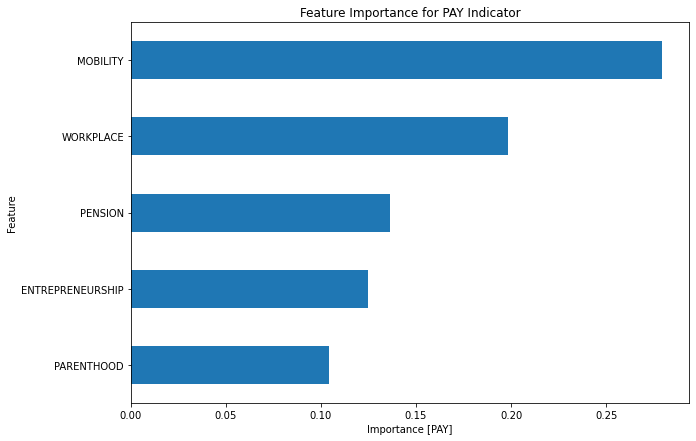

In [26]:
# Horinzontal bar chart showing the top coeffitients for your model
plt.figure(figsize=(10,7))
feat_imp.sort_values(key=abs).plot(kind='barh')
plt.title('Feature Importance for PAY Indicator')
plt.xlabel('Importance [PAY]')
plt.ylabel('Feature')

### The top two most important of our model in predicting pay is 'Mobility' and 'Workplace'